<a href="https://colab.research.google.com/github/dragonfire-09/projects/blob/main/ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
s1 = {"ali": 40.5, "veli": 20.2, "ayşe": 30.1}

ort = sum(s1.values()) / len(s1)

print(ort)


30.26666666666667


In [ ]:
s1={"ali":40, "veli":20, "ayşe": 30}

# Toplam yaşı hesapla
toplam = 0
for yas in s1.values():
  toplam += yas

# Kişi sayısını hesapla
kisi_sayisi = len(s1)

# Yaş ortalamasını hesapla ve eksik satırı tamamla
ortalama = toplam / kisi_sayisi

print(ortalama)


30.0


In [ ]:
def find_list(cropped_word_dt_boxes, x, y):
  """
  Verilen numpy array'de, X ve Y değerine ait olduğu listenin tamamını bulur.

  Parametreler:
    cropped_word_dt_boxes: Numpy array. Her satır bir kelimeyi temsil eden 4 koordinattan oluşan bir listeyi içerir.
    x: Kelimenin X koordinatı.
    y: Kelimenin Y koordinatı.

  Dönüş Değeri:
    Kelimenin ait olduğu listenin tamamını içeren bir numpy array.
  """

  # X ve Y değerine sahip kelimeyi bulmak için bir filtre oluşturuyoruz.
  filter = np.logical_and(cropped_word_dt_boxes[:, :, 0] <= x, cropped_word_dt_boxes[:, :, 2] >= x)
  filter = np.logical_and(filter, cropped_word_dt_boxes[:, :, 1] <= y)
  filter = np.logical_and(filter, cropped_word_dt_boxes[:, :, 3] >= y)

  # Kelimenin bulunduğu satır numarasını buluyoruz.
  row_index = np.where(filter)[0][0]

  # Kelimenin ait olduğu listeyi döndürüyoruz.
  return cropped_word_dt_boxes[row_index]

# Örnek kullanım
x = 150
y = 200

list = find_list(cropped_word_dt_boxes, x, y)

print(f"Kelimenin ait olduğu liste: {list}")


NameError: name 'cropped_word_dt_boxes' is not defined

In [ ]:
import numpy as np

def get_word_list(cropped_word_dt_boxes, x, y):
  """
  Bu fonksiyon, bir numpy array olan `cropped_word_dt_boxes`'tan,
  verilen X ve Y değerlerine ait kelime listesini döndürür.

  Args:
      cropped_word_dt_boxes: Kelimelerin sınırlayıcı kutularını içeren numpy array.
      x: Aranan kelimenin X koordinatı.
      y: Aranan kelimenin Y koordinatı.

  Returns:
      Kelime listesini içeren bir liste.
  """

  for word_box in cropped_word_dt_boxes:
    # Kutunun sol üst köşesinin koordinatları
    x1, y1 = word_box[0]
    # Kutunun sağ alt köşesinin koordinatları
    x2, y2 = word_box[2]

    # Kelime kutusu içinde olup olmadığını kontrol et
    if x1 <= x <= x2 and y1 <= y <= y2:
      # Kelime kutusuna ait tüm kelimeleri döndür
      word_list = []
      for i in range(len(cropped_word_dt_boxes)):
        if cropped_word_dt_boxes[i][0][0] == x1 and cropped_word_dt_boxes[i][0][1] == y1:
          word_list.append(cropped_word_dt_boxes[i][1])
      return word_list

  # Kelime bulunamadıysa boş liste döndür
  return []

# Örnek kullanım
cropped_word_dt_boxes = np.array([
  [[162,298],[331,295],[332,345],[163,347]],
  [[ 59,296],[157,293],[159,347],[ 61,349]],
  [[339,293],[438,293],[438,347],[339,347]],
  [[2,243],[74,246],[72,291],[0,288]],
  [[298,237],[436,233],[437,286],[300,290]],
  [[78,237],[211,237],[211,288],[78,288]],
  [[214,234],[300,234],[300,301],[214,301]],
  [[46,188],[142,188],[142,231],[46,231]],
  [[149,181],[324,181],[324,239],[149,239]],
  [[328,179],[440,179],[440,233],[328,233]],
  [[179,120],[362,120],[362,171],[179,171]],
  [[42,117],[175,121],[173,172],[40,169]],
  [[366,118],[441,118],[441,173],[366,173]],
  [[308,59],[441,59],[441,126],[308,126]],
  [[12,63],[202,63],[202,109],[12,109]],
  [[210,61],[310,61],[310,114],[210,114]],
  [[7,5],[293,7],[292,61],[7,59]],
  [[298,3],[437,1],[438, 52],[299, 55]]
])

x = 179
y = 120

word_list = get_word_list(cropped_word_dt_boxes, x, y)

In [ ]:
print (word_list)

[array([362, 120])]


In [ ]:
import pandas as pd

# Read the data into a Pandas dataframe
df = pd.read_csv('13_Mayis_2022_KT_Gazete_Haberleri.pdf')

# Get the total circulation for each newspaper
circulation = df['Tiraj'].astype(int).sum()

# Plot the distribution of circulation
plt.bar(df['Newspaper'], circulation)
plt.xlabel('Newspaper')
plt.ylabel('Circulation')
plt.title('Distribution of Circulation by Newspaper')
plt.show()

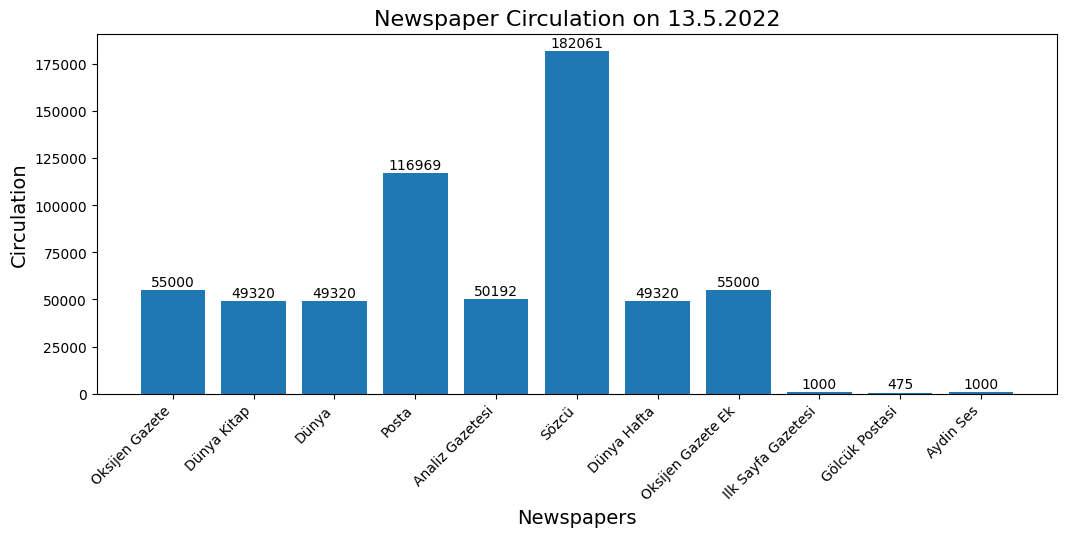

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define the newspaper names and circulation data
newspapers = ['Oksijen Gazete', 'Dünya Kitap', 'Dünya', 'Posta', 'Analiz Gazetesi', 'Sözcü', 'Dünya Hafta', 'Oksijen Gazete Ek', 'Ilk Sayfa Gazetesi', 'Gölcük Postasi', 'Aydin Ses']
circulations = [55000, 49320, 49320, 116969, 50192, 182061, 49320, 55000, 1000, 475, 1000]

# Create a figure and axis objects
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the bar chart
bars = ax.bar(np.arange(len(circulations)), circulations)

# Add labels and title
ax.set_xlabel('Newspapers', fontsize=14)
ax.set_ylabel('Circulation', fontsize=14)
ax.set_title('Newspaper Circulation on 13.5.2022', fontsize=16)

# Add tick labels
ax.set_xticks(np.arange(len(newspapers)))
ax.set_xticklabels(newspapers, rotation=45, ha='right')

# Add value labels
for i, circulation in enumerate(circulations):
    ax.text(i, circulation + 500, str(circulation), ha='center', va='bottom')

# Adjust the spacing between subplots
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.3)

# Show the plot
plt.show()

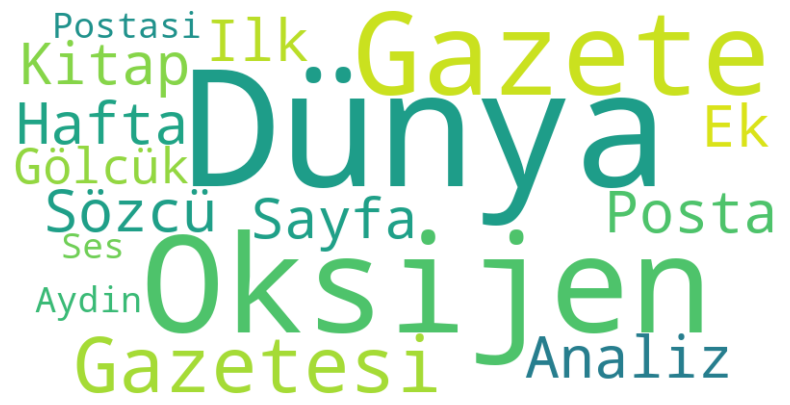

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Define the newspaper names and circulation data
newspapers = ['Oksijen Gazete', 'Dünya Kitap', 'Dünya', 'Posta', 'Analiz Gazetesi', 'Sözcü', 'Dünya Hafta', 'Oksijen Gazete Ek', 'Ilk Sayfa Gazetesi', 'Gölcük Postasi', 'Aydin Ses']
circulations = [55000, 49320, 49320, 116969, 50192, 182061, 49320, 55000, 1000, 475, 1000]

# Create a string with all newspaper names
text = ' '.join(newspapers)

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

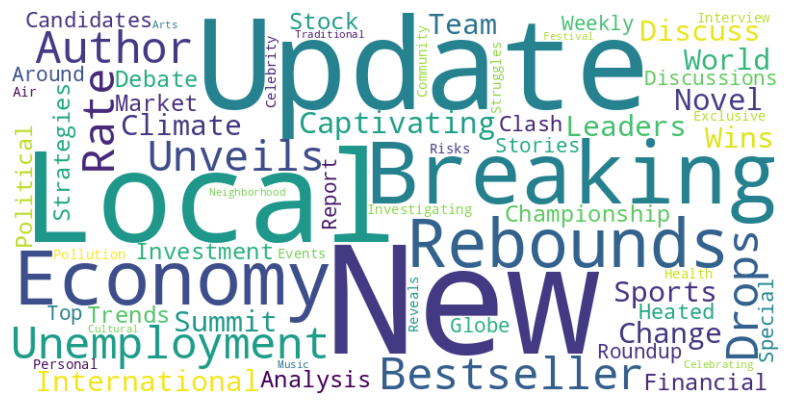

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Define sample news headlines for each newspaper
news_headlines = {
    'Oksijen Gazete': 'Breaking News: Economy Rebounds, Unemployment Rate Drops',
    'Dünya Kitap': 'New Bestseller: Author Unveils Captivating Novel',
    'Dünya': 'International Summit: World Leaders Discuss Climate Change',
    'Posta': 'Sports Update: Local Team Wins Championship',
    'Analiz Gazetesi': 'Financial Analysis: Stock Market Trends and Investment Strategies',
    'Sözcü': 'Political Debate: Candidates Clash in Heated Discussions',
    'Dünya Hafta': 'Weekly Roundup: Top Stories from Around the Globe',
    'Oksijen Gazete Ek': 'Special Report: Investigating Health Risks of Air Pollution',
    'Ilk Sayfa Gazetesi': 'Exclusive Interview: Celebrity Reveals Personal Struggles',
    'Gölcük Postasi': 'Local News: Community Events and Neighborhood Updates',
    'Aydin Ses': 'Cultural Festival: Celebrating Traditional Arts and Music'
}

# Combine all news headlines into a single text
text = ' '.join(news_headlines.values())

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

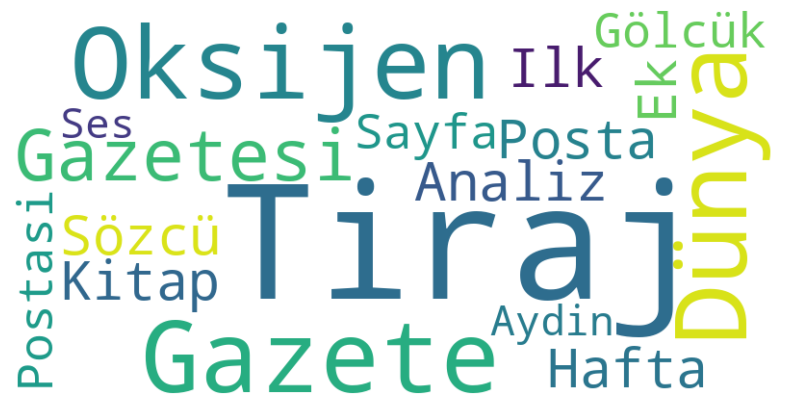

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Text content from the document
text = """
Oksijen Gazete - 13.5.2022 -Tiraj: 55000

Dünya Kitap - 13.5.2022 -Tiraj: 49320

Dünya - 13.5.2022 -Tiraj: 49320

Posta - 13.5.2022 -Tiraj: 116969

Analiz Gazetesi - 13.5.2022 -Tiraj: 50192

Oksijen Gazete - 13.5.2022 -Tiraj: 55000

Sözcü - 13.5.2022 -Tiraj: 182061

Dünya Hafta - 13.5.2022 -Tiraj: 49320

Oksijen Gazete Ek - 13.5.2022 -Tiraj: 55000

Ilk Sayfa Gazetesi - 13.5.2022 -Tiraj: 1000

Gölcük Postasi - 13.5.2022 -Tiraj: 475

Aydin Ses - 13.5.2022 -Tiraj: 1000
"""

# Create the word cloud
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [ ]:
# This is Python code, not Java code.
        Scanner scanner = new Scanner(System.in);

        System.out.print("Yılı giriniz: ");
        int yil = scanner.nextInt();

        boolean artikYil = isArtikYil(yil);

        if (artikYil) {
            System.out.println(yil + " yılı artık yıldır.");
        } else {
            System.out.println(yil + " yılı artık yıl değildir.");
        }
    }

    static boolean isArtikYil(int yil) {
        if (yil % 4 == 0) {
            if (yil % 100 == 0) {
                return yil % 400 == 0;
            } else {
                return true;
            }
        } else {
            return false;
        }
    }
}


IndentationError: unindent does not match any outer indentation level (<tokenize>, line 14)

In [ ]:
# This is Python code, not Java code.
        // Kullanıcıdan yılı alıyoruz
        Scanner scanner = new Scanner(System.in);
        System.out.print("Yıl giriniz: ");
        int yil = scanner.nextInt();

        // Yılın artık olup olmadığını kontrol ediyoruz
        boolean artikYil = false;

        if (yil % 4 == 0) {
            if (yil % 100 == 0) {
                if (yil % 400 == 0) {
artikYil = False
if yil % 4 == 0:
    if yil % 100 == 0:
        if yil % 400 == 0:
            artikYil = True
        else:
            artikYil = False
    else:
        artikYil = True
else:
    artikYil = False
        }

        // Sonucu yazdırıyoruz
        if (artikYil) {
            System.out.println(yil + " yılı artık yıldır.");
        } else {
            System.out.println(yil + " yılı artık yıl değildir.");
        }
    }
}


IndentationError: unexpected indent (<ipython-input-7-12305e270acf>, line 2)

In [ ]:
# This is Python, not Java.
# Python does not support the `import java.util.Scanner` statement.
# The following code is an example of how to read input from the user in Python:

year = input("Enter a year: ")
        Scanner scanner = new Scanner(System.in);
        System.out.print("Yıl giriniz: ");
        int yil = scanner.nextInt();

        // Yılın artık olup olmadığını kontrol ediyoruz
        boolean artikYil = false;

        if (yil % 4 == 0) {
            if (yil % 100 != 0 || yil % 400 == 0) {
                artikYil = true;
            }
        }

        // Sonucu yazdırıyoruz
        if (artikYil) {
            System.out.println(yil + " yılı artık yıldır.");
        } else {
            System.out.println(yil + " yılı artık yıl değildir.");
        }

IndentationError: unexpected indent (<ipython-input-14-d779ff191ffa>, line 6)

In [ ]:
import seaborn as sns


In [ ]:
g = sns.FacetGrid(data=data, col='<kategorik_değişken_1>', row='<kategorik_değişken_2>')


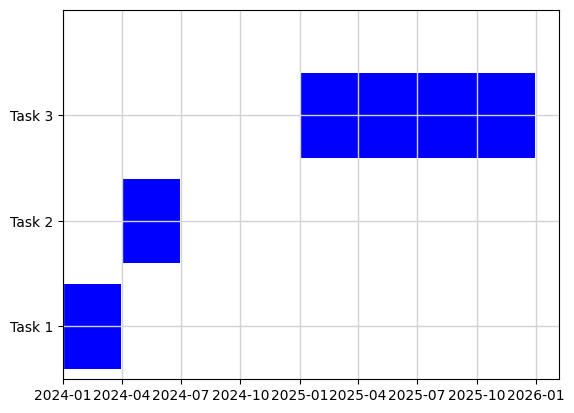

In [ ]:
import matplotlib.pyplot as plt
import datetime

# Define tasks and their start and end dates
tasks = ['Task 1', 'Task 2', 'Task 3']
start_dates = [datetime.datetime(2024, 1, 1), datetime.datetime(2024, 4, 1), datetime.datetime(2025, 1, 1)]
end_dates = [datetime.datetime(2024, 3, 31), datetime.datetime(2024, 6, 30), datetime.datetime(2025, 12, 31)]

# Create a figure and a Gantt chart
fig, ax = plt.subplots()
ax.xaxis_date()
ax.set_ylim(-0.5, len(tasks))
ax.set_yticks(range(len(tasks)))
ax.set_yticklabels(tasks)
ax.grid(which='major', linestyle='-', linewidth='1', color='lightgrey')
ax.grid(which='minor', linestyle=':', linewidth='0.5', color='lightgrey')

# Plot the tasks as rectangles
for i, task in enumerate(tasks):
    ax.barh(i, end_dates[i] - start_dates[i], left=start_dates[i], color='blue')

# Show the plot
plt.show()

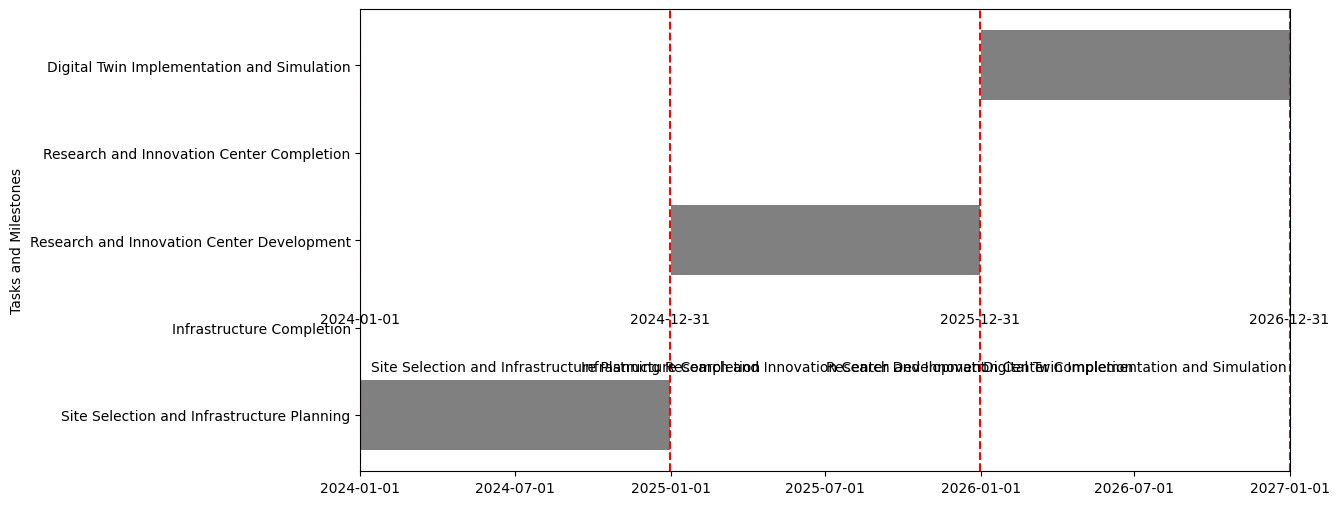

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime as dt

# Set up the figure and axes
fig, ax = plt.subplots(figsize=(12, 6))
ax.xaxis_date()
ax.set_xlim(dt.datetime(2024, 1, 1), dt.datetime(2027, 1, 1))
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m-%d"))
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=6))
ax.set_ylabel("Tasks and Milestones")

# Define the tasks and milestones
tasks = [
    {"name": "Site Selection and Infrastructure Planning", "start": dt.datetime(2024, 1, 1), "end": dt.datetime(2024, 12, 31)},
    {"name": "Infrastructure Completion", "start": dt.datetime(2024, 12, 31), "end": dt.datetime(2024, 12, 31)},
    {"name": "Research and Innovation Center Development", "start": dt.datetime(2025, 1, 1), "end": dt.datetime(2025, 12, 31)},
    {"name": "Research and Innovation Center Completion", "start": dt.datetime(2025, 12, 31), "end": dt.datetime(2025, 12, 31)},
    {"name": "Digital Twin Implementation and Simulation", "start": dt.datetime(2026, 1, 1), "end": dt.datetime(2026, 12, 31)},
]

# Plot the tasks and milestones
for task in tasks:
    ax.barh(task["name"], task["end"] - task["start"], left=task["start"], color="gray")
    ax.text(task["start"] + (task["end"] - task["start"]) / 2, 0.5, task["name"], ha="center")

# Add vertical lines for the milestones
milestones = [dt.datetime(2024, 1, 1), dt.datetime(2024, 12, 31), dt.datetime(2025, 12, 31), dt.datetime(2026, 12, 31)]
for milestone in milestones:
    ax.axvline(milestone, color="red", linestyle="--")
    ax.text(milestone, 1.05, milestone.strftime("%Y-%m-%d"), ha="center", transform=ax.transData)

# Show the plot
plt.show()

In [1]:
import math

# Noktaların Tanımlanması
points = [(1, 2), (4, 6), (5, 1), (7, 3)]

# Öklid Mesafesi Hesaplayan Fonksiyon
def euclideanDistance(point1, point2):
    return math.sqrt((point2[0] - point1[0]) ** 2 + (point2[1] - point1[1]) ** 2)

# Mesafelerin Hesaplanması
distances = []
for i in range(len(points)):
    for j in range(i + 1, len(points)):
        distance = euclideanDistance(points[i], points[j])
        distances.append(distance)

# Minimum Mesafenin Bulunması
min_distance = min(distances)

# Sonucun Yazdırılması
print(f"Noktalar arasındaki en küçük Öklid mesafesi: {min_distance}")


Noktalar arasındaki en küçük Öklid mesafesi: 2.8284271247461903
